In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport



profile = ProfileReport(df, title="Data Analysis Report", explorative=True)

profile.to_file("data_analysis_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 176.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Tv is Highly Corelated with sales

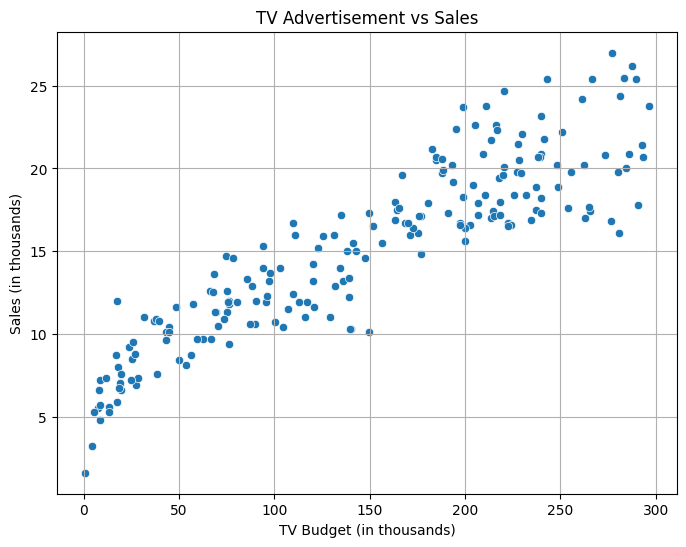

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title("TV Advertisement vs Sales")
plt.xlabel("TV Budget (in thousands)")
plt.ylabel("Sales (in thousands)")
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

class SGDLinearRegression:
    def __init__(self, lr=0.0001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        y = np.array(y).reshape(-1, 1)

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))

        for epoch in range(self.n_iter):
            for i in range(n_samples):
                xi = X[i, :].reshape(1, -1)
                yi = y[i]
                prediction = xi @ self.weights
                error = prediction - yi
                gradient = 2 * xi.T * error
                self.weights -= self.lr * gradient


            y_pred = X @ self.weights
            mse = np.mean((y - y_pred) ** 2)
            self.loss_history.append(mse)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.weights

    def plot_loss(self):
        plt.figure(figsize=(8, 4))
        plt.plot(range(self.n_iter), self.loss_history, color='blue')
        plt.title("Loss (MSE) vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.tight_layout()
        plt.show()



In [9]:
import numpy as np
import matplotlib.pyplot as plt

class BatchLinearRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        y = y.reshape(-1, 1)
        self.weights = np.zeros((X.shape[1], 1))

        for epoch in range(self.n_iter):
            prediction = X @ self.weights
            error = prediction - y
            gradient = 2 * X.T @ error / len(X)
            self.weights -= self.lr * gradient


            mse = np.mean(error ** 2)
            self.loss_history.append(mse)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.weights

    def plot_loss(self):
        plt.figure(figsize=(8, 4))
        plt.plot(range(self.n_iter), self.loss_history, color='green')
        plt.title("Loss (MSE) vs Epochs - Batch Gradient Descent")
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [10]:
def remove_outliers(df):
    df_clean = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [11]:
df= remove_outliers(df)

In [12]:
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

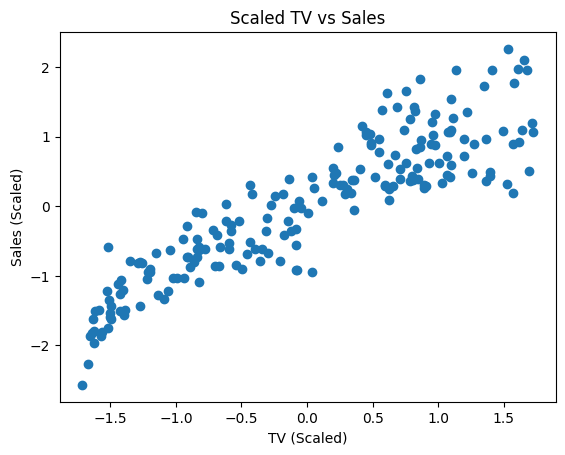

In [13]:
X = df[['TV']].values
y = df['Sales'].values.reshape(-1, 1)

X_scaled, x_mean, x_std = standard_scaler(X)
y_scaled, y_mean, y_std = standard_scaler(y)

plt.scatter(X_scaled, y_scaled)
plt.xlabel('TV (Scaled)')
plt.ylabel('Sales (Scaled)')
plt.title('Scaled TV vs Sales')
plt.show()

In [14]:
model=SGDLinearRegression();
model2=BatchLinearRegression();

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [16]:
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)

In [17]:
y_pred=model.predict(X_test)

y_pred2=model2.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
print("Mean Squared Error (MSE):", mean_squared_error(Y_test , y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test , y_pred))
print("R² Score:", r2_score(Y_test , y_pred))
print("Mean Squared Error (MSE)2 :", mean_squared_error(Y_test, y_pred2))
print("Mean Absolute Error (MAE)2 :", mean_absolute_error(Y_test , y_pred2))
print("R² Score:2 ", r2_score(Y_test , y_pred2))

Mean Squared Error (MSE): 0.17897086346378793
Mean Absolute Error (MAE): 0.3466361664783878
R² Score: 0.8218157978546944
Mean Squared Error (MSE)2 : 0.20249881440970102
Mean Absolute Error (MAE)2 : 0.3684901141310913
R² Score:2  0.7983912633451447


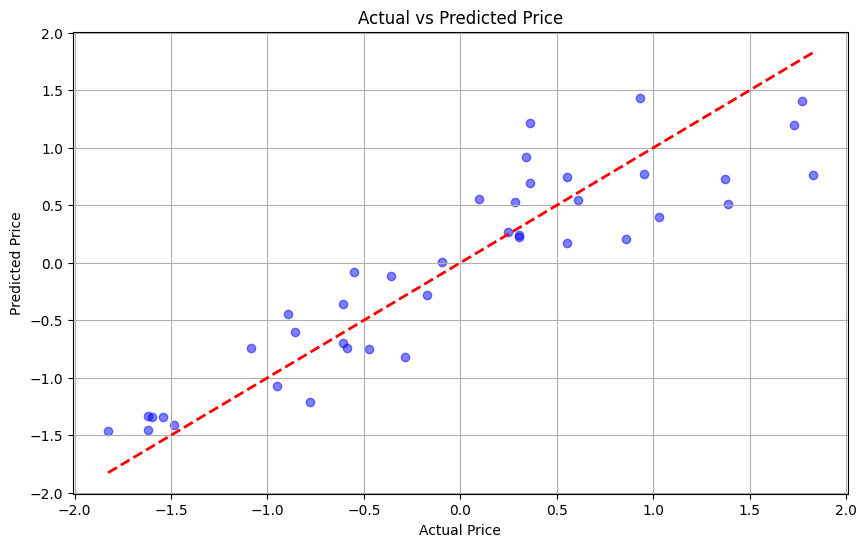

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()


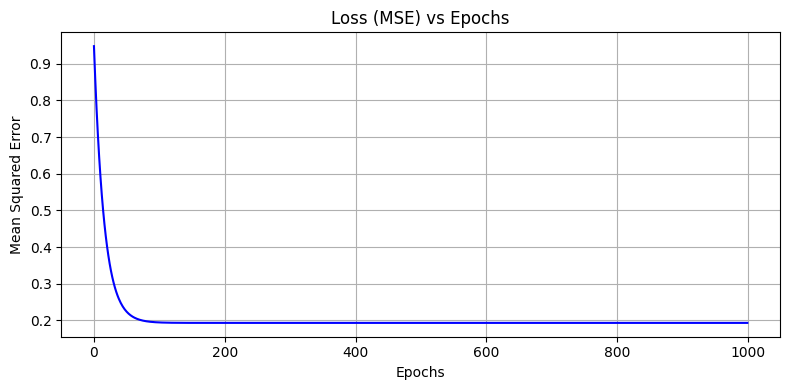

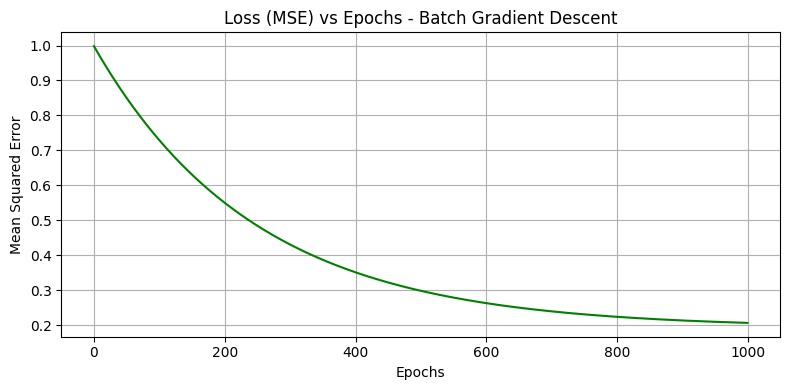

In [21]:
model.plot_loss()
model2.plot_loss()